# Pedro Barrera a1801 - desafio 2

## Consigna:
- Crear sus propios vectores con Gensim basado en lo visto en clase con otro dataset.
- Probar términos de interés y explicar similitudes en el espacio de embeddings (sacar conclusiones entre palabras similitudes y diferencias).
- Graficarlos.
- Obtener conclusiones.

In [ ]:
# Imports y setup (siguiendo tu estilo)
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from tensorflow.keras.preprocessing.text import text_to_word_sequence

## Preprocesamiento y entrenamiento

In [15]:
# Posibles bandas
os.listdir("datasets/songs_dataset/")

['prince.txt',
 'dickinson.txt',
 'notorious-big.txt',
 'beatles.txt',
 'bob-dylan.txt',
 'bjork.txt',
 'johnny-cash.txt',
 'disney.txt',
 'janisjoplin.txt',
 'kanye.txt',
 'bob-marley.txt',
 'leonard-cohen.txt',
 'ludacris.txt',
 'adele.txt',
 'alicia-keys.txt',
 'joni-mitchell.txt',
 'amy-winehouse.txt',
 'lorde.txt',
 'rihanna.txt',
 'Kanye_West.txt',
 'nirvana.txt',
 'cake.txt',
 'bieber.txt',
 'notorious_big.txt',
 'missy-elliott.txt',
 'dolly-parton.txt',
 'jimi-hendrix.txt',
 'michael-jackson.txt',
 'al-green.txt',
 'lil-wayne.txt',
 'lady-gaga.txt',
 'lin-manuel-miranda.txt',
 'nursery_rhymes.txt',
 'dj-khaled.txt',
 'radiohead.txt',
 'patti-smith.txt',
 'blink-182.txt',
 'Lil_Wayne.txt',
 'dr-seuss.txt',
 'r-kelly.txt',
 'drake.txt',
 'britney-spears.txt',
 'bruce-springsteen.txt',
 'nicki-minaj.txt',
 'kanye-west.txt',
 'paul-simon.txt',
 'nickelback.txt',
 'eminem.txt',
 'bruno-mars.txt']

In [16]:
# Armar el dataset utilizando salto de línea para separar las oraciones/docs
df = pd.read_csv('datasets/songs_dataset/bob-dylan.txt', sep='/n', header=None)
df.head()

/var/folders/59/3hrwl3sd44b60yzl315r04rm0000gn/T/ipykernel_89573/1087124801.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('datasets/songs_dataset/bob-dylan.txt', sep='/n', header=None)


,0
0,"“There must be some way out of here,” said the..."
1,"“There’s too much confusion, I can’t get no re..."
2,"Businessmen, they drink my wine, plowmen dig m..."
3,None of them along the line know what any of i...
4,"“No reason to get excited,” the thief, he kind..."


Tokenizo los documentos

In [17]:
sentence_tokens = []
# Recorrer todas las filas y transformar las oraciones
# en una secuencia de palabras (en nuestro caso son nuestreos tokens)
for _, row in df[:None].iterrows():
    sentence_tokens.append(text_to_word_sequence(row[0]))

#Ejemplo de salida
sentence_tokens[:2]

[['“there',
  'must',
  'be',
  'some',
  'way',
  'out',
  'of',
  'here',
  '”',
  'said',
  'the',
  'joker',
  'to',
  'the',
  'thief'],
 ['“there’s', 'too', 'much', 'confusion', 'i', 'can’t', 'get', 'no', 'relief']]

In [18]:
# Callback para poder loss por epoca
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

In [19]:
# Crearmos el modelo generador de vectores como vimos en la clase, usando Skipgram
w2v_model = Word2Vec(min_count=5,    # frecuencia mínima de palabra para incluirla en el vocabulario
                     window=2,       # cant de palabras antes y desp de la predicha
                     vector_size=300,       # dimensionalidad de los vectores 
                     negative=20,    # cantidad de negative samples... 0 es no se usa
                     workers=1,      # si tienen más cores pueden cambiar este valor
                     sg=1)           # modelo 0:CBOW  1:skipgram

In [20]:
#Construmos el vocabulario
w2v_model.build_vocab(sentence_tokens)
print("Cantidad de docs en el corpus:", w2v_model.corpus_count)
print("Cantidad de words distintas en el corpus:", len(w2v_model.wv.index_to_key))

Cantidad de docs en el corpus: 5213
Cantidad de words distintas en el corpus: 948


In [21]:
# Entrenamos el modelo generador de vectores como vimos en clase con el callback 
w2v_model.train(sentence_tokens,
                 total_examples=w2v_model.corpus_count,
                 epochs=20,
                 compute_loss = True,
                 callbacks=[callback()]
                 )

Loss after epoch 0: 291879.03125
Loss after epoch 1: 186107.6875
Loss after epoch 2: 190404.53125
Loss after epoch 3: 188903.0625
Loss after epoch 4: 189508.625
Loss after epoch 5: 161680.8125
Loss after epoch 6: 160562.875
Loss after epoch 7: 157756.75
Loss after epoch 8: 155807.875
Loss after epoch 9: 152405.875
Loss after epoch 10: 151594.0
Loss after epoch 11: 144523.125
Loss after epoch 12: 129787.75
Loss after epoch 13: 127296.75
Loss after epoch 14: 126569.5
Loss after epoch 15: 126077.5
Loss after epoch 16: 126191.25
Loss after epoch 17: 126207.0
Loss after epoch 18: 123475.25
Loss after epoch 19: 126597.75


(443235, 768300)

## Analizo similitudes

Imprimo las palabras mas similares a las elegidas

In [ ]:
#Para imprimir de forma mas clara estos resultados se genero el codigo de manera asistida con inteligencia artificial, usando gpt-5 de openAI
#Este fue el prompt, poniendo dentro del contexto el archivo:

#prompt: puedes mostrar una forma distinta de imprimir los resultados de similitud con las palabras terms_to_analyze? poniendo por cada palabra tener como columna la similar word y como fila la cosine sim. Pero un cuadro por cada term to analize

from IPython.display import display

terms_to_analyze = ["love", "night", "woman", "man", "truth", "heart"]

def safe_most_similar(model, positive=None, negative=None, topn=5):
    try:
        return model.wv.most_similar(positive=positive, negative=negative, topn=topn)
    except KeyError as e:
        print(f"Token fuera de vocabulario: {e}")
        return []

def show_similarity_frames(model, terms, topn=5, precision=3):
    frames = {}
    for term in terms:
        sims = safe_most_similar(model, positive=[term], topn=topn)
        if not sims:
            print(f"Sin resultados para: {term}")
            continue
        words = [w for w, s in sims]
        scores = [s for w, s in sims]
        df = pd.DataFrame([scores], index=["cosine_sim"], columns=words).round(precision)
        frames[term] = df
        display(df.style.set_caption(f"Vecinos de: {term}").background_gradient(axis=None, cmap="YlGnBu"))
    return frames

frames_by_term = show_similarity_frames(w2v_model, terms_to_analyze, topn=10, precision=3)

,help,shot,sick,need,isn’t,true,doctor,makes,drink,speaks
cosine_sim,0.773000,0.753000,0.728000,0.714000,0.712000,0.692000,0.689000,0.688000,0.682000,0.682000


,alley,sun,daddy’s,cove,darkness,gold,ancient,along,fact’ry,saving
cosine_sim,0.856000,0.854000,0.851000,0.839000,0.836000,0.836000,0.834000,0.833000,0.833000,0.832000


,takes,letter,unknown,speaks,seems,dream,fell,girl,walkin',yes
cosine_sim,0.844000,0.804000,0.792000,0.787000,0.787000,0.785000,0.779000,0.778000,0.774000,0.774000


,hey,mr,song,tambourine,play,names,gave,years,sees,ev’ry
cosine_sim,0.824000,0.791000,0.787000,0.771000,0.737000,0.724000,0.702000,0.671000,0.651000,0.649000


,glow,warm,fears,lenny,second,word,grass,moment,worse,false
cosine_sim,0.968000,0.961000,0.960000,0.959000,0.959000,0.958000,0.958000,0.958000,0.956000,0.955000


,yearnin',face,kiss,mouth,soul,deep,burnin',feet,tongue,happiness
cosine_sim,0.836000,0.822000,0.793000,0.788000,0.783000,0.780000,0.777000,0.773000,0.773000,0.771000


En “love” las palabras más cercanas dentro del conjunto de las mas similares son heart y woman. Se nota un eje claramente afectivo. Con true mantiene una relacion moderada (más reflexiva que romántica), mientras que con night baja bastante y con man queda lejos. Esto sugiere que “love” para bob dylan gravita sobre lo emocional y se aparta de lo social (como drink, speaks). Otras palabras pueden intuirse aparecen por motivos mas poeticos o metaforicos, como 'sick', con frases comunes en ingles como 'love sick' o 'sick in love'.

En “woman” vemos que se lo asocia a lo mas sentimental, con feel, dream y tambien a frases romanticas normales, como letter, que se utiliza mucho en frases como cartas de amor.

En “man” se ve una combinacion muy dispar de palabras con significados muy distintos. Aunque Mr aparece cerca, que efectivamente tiene cercania, el resto pareciera ser mas aleatorio e indica que el vector alcanzo una verdadera relacion semantica, sino que fue principalmente afectado por palabras no relacionadas que deben aparecer muy seguido solo por casualdiad de frases comunes.

En “night” si se ven palabras mas similares a contextos similares o significados parecidos, como darkness, alley o contrarias como sun. Luego aparecen palabras que suelen verse junto a night en el ambito poetico como ancient o gold.

Para truth, tambien hay una mezcla de palabras que pueden tener similitudes en el sentido poetico como warm y fears, indicando que la verdad da miedo pero por otro lado es calida, reconfortante. 

En “heart” se ven muchas palabras relacionadas a lo afectivo a romantico, viendo que se le da un sentido semantico mas simialr a su acepcion figurada relacionado al centro del amor (el corazon) y no tanto al organo, algo que tiene mucho sentido considerando que se generaron los vectores con letras de canciones y el tinte romantico suele primar en estas.

En resumen, puede verse que al entrenarse con canciones, y mas especificamente de bob dylan que utiliza muchos recursos poeticos, prima en las similitudes mas el sentido figurado poetico y profundo, mas hacia las emocioens que una palabra evoca o expresiones poeticas que ladefinicion extricta de la palabra.

Pruebo algunos tambien por la negativa

In [ ]:
w2v_model.wv.most_similar(negative=["love"], topn=10)

[('at', -0.151947483420372),
 ('high', -0.17393489181995392),
 ('around', -0.17714862525463104),
 ('are', -0.19808731973171234),
 ('joey', -0.20210276544094086),
 ('let', -0.21197858452796936),
 ('when', -0.21626387536525726),
 ('door', -0.22052891552448273),
 ('there', -0.22899527847766876),
 ('they', -0.23069611191749573)]

Pruebo combinaciones vectoriales

In [49]:
def show_similarity_frames_combined(model, terms, topn=10, precision=3):
    frames = {}

    sims = safe_most_similar(model, positive=terms, topn=topn)
    words = [w for w, s in sims]
    scores = [s for w, s in sims]
    df = pd.DataFrame([scores], index=["cosine_sim"], columns=words).round(precision)
    terms_str = " + ".join(map(str, terms))
    frames[terms_str] = df
    
    display(df.style.set_caption(f"Vecinos de: {terms_str}").background_gradient(axis=None, cmap="YlGnBu"))
    return frames


show_similarity_frames_combined(w2v_model,["woman", "love", "man"])
show_similarity_frames_combined(w2v_model,["woman", "man"])
show_similarity_frames_combined(w2v_model,["clouds","water"])
print()

,letter,takes,smile,sound,ghost,unknown,speaks,chance,breath,voice
cosine_sim,0.831000,0.830000,0.824000,0.819000,0.815000,0.815000,0.810000,0.809000,0.809000,0.806000


,song,hey,letter,takes,ghost,sound,smile,chance,such,voice
cosine_sim,0.816000,0.809000,0.806000,0.790000,0.788000,0.782000,0.782000,0.781000,0.780000,0.780000


,everywhere,storms,rollin’,sea,fallin’,dry,side,ocean,six,outside
cosine_sim,0.971000,0.955000,0.955000,0.952000,0.949000,0.947000,0.944000,0.944000,0.944000,0.939000


En “woman + love + man” las palabras mas similares tocan temas relacionados a lo comunicativo, afectivo y amoroso: aparecen letter, smile, breath, voice, speaks, chance. La suma de “love” arrastra la combinación hacia lo afectivo y la expresión personal. ghost y unknown son expresiones del pasado, como el amor es algo desconocido o frases poeticas como 'ghost' de un amor.

al sacar love, en “woman + man” las palabras que aparecen son similares pero de menor similitud. Se nota que al quitar love se remueve un poco del contenido romantico y esto demuestra que el vector efectivamente capta el significado semantico de la palabra.

Se intento a lo ultimo con “clouds + water”, de alguna manera para formar cosas relacionadas a la lluvia.Puede verse esto en la aparicion de 'storm' entre las mas similares. Palabras que se usan en contextos muy similares tambien aparecen, aunque el contenido semantico no sea tan parecido. esto es debido a que son o palabras comunes o que se utilizan en paralelismos a metaforas, como outside, o everywere, o osea o sea que podira correlacionarse con expresiones mas poeticas o metaforicas del ingles como 'its raining oceans'.

Grafico el mapa de similitud entre de los terminos elegidos entre si

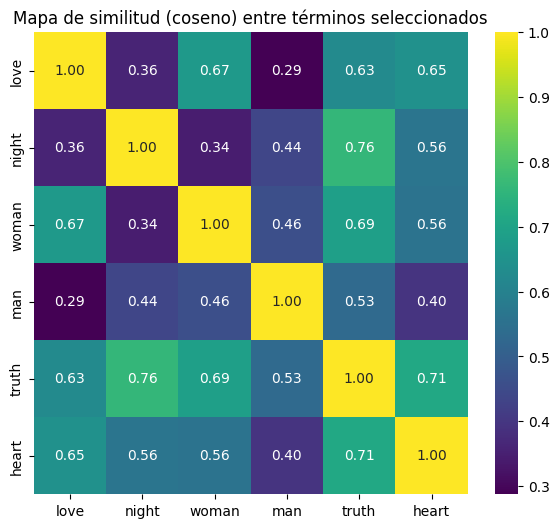

In [50]:
selected = [w for w in terms_to_analyze]
if len(selected) >= 2:
    mat = np.zeros((len(selected), len(selected)))
    for i, wi in enumerate(selected):
        for j, wj in enumerate(selected):
            if i == j:
                mat[i, j] = 1.0
            else:
                mat[i, j] = w2v_model.wv.similarity(wi, wj)
    plt.figure(figsize=(7, 6))
    sns.heatmap(pd.DataFrame(mat, index=selected, columns=selected), annot=True, fmt=".2f", cmap="viridis")
    plt.title("Mapa de similitud (coseno) entre términos seleccionados")
    plt.show()

En las palabras seleccionadas, se pueden distinguir dos núcleos de significado y sentimiento: podriamos identificar un mas moral o reflexivo (truth, night, heart) y otro afectivo (love, woman). Las asociaciones más sólidas son truth–night (0.76), heart–truth (0.71) y, dentro de lo romántico, love–woman (0.67) y love–heart (0.65), que encajan con una tematica romantica comun en canciones en general. Sorprende que algunas parejas que uno creería más cercanas seanmas bajar. love–night cae a 0.36 y woman–man queda en 0.46.
Otra cosa sorprendente es que 'man' aparece mas lejos respecto del los terminos afectivos (love–man 0.29, heart–man 0.40), lo que parece indicar que no esta muy ligado a tematicas afectivas en caciones de Bob Dylan.

## Visualizo los vectores y sus agrupaciones con t-SNE

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

def reduce_dimensions(model, num_dimensions=2, max_words=200, random_state=0, perplexity=30):
    labels = np.asarray(model.wv.index_to_key)
    vectors = np.asarray(model.wv.vectors)

    max_words = min(max_words, len(labels))
    labels = labels[:max_words]
    vectors = vectors[:max_words]

    tsne = TSNE(n_components=num_dimensions, random_state=random_state, init="pca", perplexity=min(perplexity, max(5, max_words - 1)))
    reduced = tsne.fit_transform(vectors)
    return reduced, labels

In [ ]:
vecs2, labels2 = reduce_dimensions(w2v_model, num_dimensions=2, max_words=200)
fig2 = px.scatter(x=vecs2[:, 0], y=vecs2[:, 1], text=labels2, title="TSNE 2D")
fig2.update_traces(marker_size=6)
fig2.show()

In [ ]:
vecs3, labels3 = reduce_dimensions(w2v_model, num_dimensions=3, max_words=200)
fig3 = px.scatter_3d(x=vecs3[:, 0], y=vecs3[:, 1], z=vecs3[:, 2], text=labels3, title="TSNE 3D")
fig3.update_traces(marker_size=2)
fig3.show()